In [20]:

from tensorflow import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
from codecarbon import track_emissions
from tensorflow.keras.callbacks import EarlyStopping

(X_train, y_train_label), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape((-1,28,28,1)) 
X_test = X_test.reshape((-1,28,28,1)) 
y_train = keras.utils.to_categorical(y_train_label)

In [21]:
X_train.shape, y_train.shape

((60000, 28, 28, 1), (60000, 10))

In [22]:
def show_picture(image_value, label):
    plt.imshow(image_value, cmap='grey')
    plt.title(f'Picture label is {label}')
    plt.show()

In [23]:
X_test.shape

(10000, 28, 28, 1)

In [24]:
X_validation = X_test[:5000]
y_validation = keras.utils.to_categorical(y_test[:5000])
X_validation.shape, y_validation.shape
X_test = X_test[5000:]
y_test = keras.utils.to_categorical(y_test[5000:])
X_validation.shape, y_validation.shape, X_test.shape, y_test.shape

((5000, 28, 28, 1), (5000, 10), (5000, 28, 28, 1), (5000, 10))

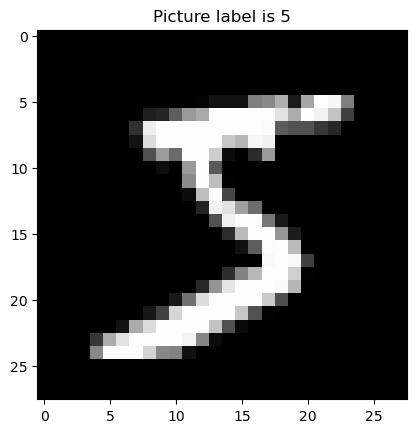

In [25]:
show_picture(X_train[0],y_train_label[0])

In [26]:
from keras import layers
from keras import regularizers
simple = keras.models.Sequential(name='cnn')
simple.add(keras.layers.InputLayer(shape=(28,28,1), name='input'))
simple.add(keras.layers.Rescaling(scale=2/255, offset=1.0, name='rescale') )

simple.add(keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, activation='relu', name='conv1'))
simple.add(keras.layers.MaxPooling2D(name='pool1'))
simple.add(keras.layers.Conv2D(filters=64, kernel_size=4, activation='relu', strides=1, name='conv2'))
simple.add(keras.layers.MaxPooling2D(name='pool2'))
simple.add(keras.layers.Conv2D(filters=128, kernel_size=3,activation='relu',  strides=1, name='conv3'))
simple.add(keras.layers.Flatten(name='flatten'))
simple.add(keras.layers.Dense(units=10, kernel_regularizer= regularizers.L1L2(l1=1e-5, l2=1e-4), activation='softmax', name='output'))

simple.summary()

Model: "cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescale (Rescaling)             │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 10, 10, 64)     │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │        11,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,538 (463.04 KB)

 Trainable params: 118,538 (463.04 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
mid = keras.models.Sequential(name='cnn')
mid.add(keras.layers.InputLayer(shape=(28,28,1), name='input'))
mid.add(keras.layers.Rescaling(scale=2/255, offset=1.0, name='rescale') )

mid.add(keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, activation='relu', name='conv1'))
mid.add(keras.layers.MaxPooling2D(name='pool1'))
mid.add(keras.layers.Conv2D(filters=64, kernel_size=4, activation='relu', strides=1, name='conv2'))
mid.add(keras.layers.MaxPooling2D(name='pool2'))
mid.add(keras.layers.Conv2D(filters=128, kernel_size=3,activation='relu',  strides=1, name='conv3'))
mid.add(keras.layers.Flatten(name='flatten'))
mid.add(keras.layers.Dense(units=512, activation='relu', name='dense1'))
mid.add(keras.layers.Dense(units=256, activation='relu', name='dense2'))
mid.add(keras.layers.Dense(units=10, activation='softmax', kernel_regularizer= regularizers.L1L2(l1=1e-5, l2=1e-4), name='output'))

mid.summary()

Model: "cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescale (Rescaling)             │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 10, 10, 64)     │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 512)            │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense2 (Dense)                  │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 831,242 (3.17 MB)

 Trainable params: 831,242 (3.17 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
large = keras.models.Sequential(name='cnn')
large.add(keras.layers.InputLayer(shape=(28,28,1), name='input'))
large.add(keras.layers.Rescaling(scale=2/255, offset=1.0, name='rescale') )

large.add(keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, activation='relu', name='conv1'))
large.add(keras.layers.MaxPooling2D(name='pool1'))
large.add(keras.layers.Conv2D(filters=64, kernel_size=4, activation='relu', strides=1, name='conv2'))
large.add(keras.layers.MaxPooling2D(name='pool2'))
large.add(keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu',  strides=1, name='conv3'))
large.add(keras.layers.Flatten(name='flatten'))
large.add(keras.layers.Dense(units=1024, activation='relu', name='dense0'))
large.add(keras.layers.Dense(units=512, activation='relu', name='dense1'))
large.add(keras.layers.Dense(units=256, activation='relu', name='dense2'))
large.add(keras.layers.Dense(units=128, activation='relu', name='dense3'))
large.add(keras.layers.Dense(units=64, activation='relu', name='dense4'))
large.add(keras.layers.Dense(units=10, activation='softmax',kernel_regularizer= regularizers.L1L2(l1=1e-5, l2=1e-4), name='output'))

large.summary()

Model: "cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescale (Rescaling)             │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 10, 10, 64)     │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense0 (Dense)                  │ (None, 1024)           │     1,180,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense2 (Dense)                  │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense3 (Dense)                  │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense4 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,985,610 (7.57 MB)

 Trainable params: 1,985,610 (7.57 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
call_back_simple=keras.callbacks.ModelCheckpoint(
    filepath='/homes/rmeshita/Documents/Programming_6/Green_ML/model_save.keras',
    monitor='val_loss',
    save_best_only=True
)
call_back_mid=keras.callbacks.ModelCheckpoint(
    filepath='/homes/rmeshita/Documents/Programming_6/Green_ML/mid_model_save.keras',
    monitor='val_loss',
    save_best_only=True
)
call_back_large=keras.callbacks.ModelCheckpoint(
    filepath='/homes/rmeshita/Documents/Programming_6/Green_ML/large_model_save.keras',
    monitor='val_loss',
    save_best_only=True
)
early_stopping = EarlyStopping(
    monitor = 'val_loss',
    patience = 2,
    verbose = 1,
    restore_best_weights = True,
    mode = 'auto'
)

# Experiment 1: Carbon emission on Different model sizes


[codecarbon INFO @ 02:04:02] [setup] RAM Tracking...
[codecarbon INFO @ 02:04:02] [setup] GPU Tracking...
[codecarbon INFO @ 02:04:02] No GPU found.
[codecarbon INFO @ 02:04:02] [setup] CPU Tracking...
[codecarbon WARNING @ 02:04:02] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 02:04:03] We saw that you have a Intel(R) Xeon(R) Gold 6248 CPU @ 2.50GHz but we don't know it. Please contact us.
[codecarbon INFO @ 02:04:03] CPU Model on constant consumption mode: Intel(R) Xeon(R) Gold 6248 CPU @ 2.50GHz
[codecarbon INFO @ 02:04:03] >>> Tracker's metadata:
[codecarbon INFO @ 02:04:03]   Platform system: Linux-6.1.0-31-amd64-x86_64-with-glibc2.36
[codecarbon INFO @ 02:04:03]   Python version: 3.12.3
[codecarbon INFO @ 02:04:03]   CodeCarbon version: 2.2.2
[codecarbon INFO @ 02:04:03]   Available RAM : 880.353 GB
[codecarbon INFO @ 02:04:03]   CPU count: 80
[codecarbon INFO @ 02:04:03]   CPU model: Intel(R) Xeon(R) Gold 6248 CPU @ 2.50GHz
[codecarbon INF

Epoch 1/5
1474/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - categorical_accuracy: 0.7425 - loss: 0.8708

[codecarbon INFO @ 02:04:21] Energy consumed for RAM : 0.001376 kWh. RAM Power : 330.13251399993896 W


1479/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - categorical_accuracy: 0.7430 - loss: 0.8693

[codecarbon INFO @ 02:04:21] Energy consumed for all CPUs : 0.000177 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:04:21] 0.001553 kWh of electricity used since the beginning.


2996/3000 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - categorical_accuracy: 0.8217 - loss: 0.6043

[codecarbon INFO @ 02:04:36] Energy consumed for RAM : 0.002751 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 02:04:36] Energy consumed for all CPUs : 0.000354 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:04:36] 0.003105 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 31s 10ms/step - categorical_accuracy: 0.8219 - loss: 0.6038 - val_categorical_accuracy: 0.9620 - val_loss: 0.1307
Epoch 2/5
1429/3000 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - categorical_accuracy: 0.9692 - loss: 0.1025

[codecarbon INFO @ 02:04:51] Energy consumed for RAM : 0.004126 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 02:04:51] Energy consumed for all CPUs : 0.000531 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:04:51] 0.004657 kWh of electricity used since the beginning.


2983/3000 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - categorical_accuracy: 0.9710 - loss: 0.0982

[codecarbon INFO @ 02:05:06] Energy consumed for RAM : 0.005501 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 02:05:06] Energy consumed for all CPUs : 0.000708 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:05:06] 0.006210 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 30s 10ms/step - categorical_accuracy: 0.9710 - loss: 0.0981 - val_categorical_accuracy: 0.9708 - val_loss: 0.0949
Epoch 3/5
1390/3000 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - categorical_accuracy: 0.9794 - loss: 0.0723

[codecarbon INFO @ 02:05:21] Energy consumed for RAM : 0.006876 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 02:05:21] Energy consumed for all CPUs : 0.000885 kWh. Total CPU Power : 42.5 W


1395/3000 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - categorical_accuracy: 0.9794 - loss: 0.0723

[codecarbon INFO @ 02:05:21] 0.007762 kWh of electricity used since the beginning.


2941/3000 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - categorical_accuracy: 0.9802 - loss: 0.0706

[codecarbon INFO @ 02:05:36] Energy consumed for RAM : 0.008251 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 02:05:36] Energy consumed for all CPUs : 0.001062 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:05:36] 0.009314 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 30s 10ms/step - categorical_accuracy: 0.9802 - loss: 0.0706 - val_categorical_accuracy: 0.9696 - val_loss: 0.0926
Epoch 4/5
1349/3000 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - categorical_accuracy: 0.9822 - loss: 0.0633

[codecarbon INFO @ 02:05:51] Energy consumed for RAM : 0.009627 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 02:05:51] Energy consumed for all CPUs : 0.001240 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:05:51] 0.010866 kWh of electricity used since the beginning.


2895/3000 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - categorical_accuracy: 0.9832 - loss: 0.0602

[codecarbon INFO @ 02:06:06] Energy consumed for RAM : 0.011002 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 02:06:06] Energy consumed for all CPUs : 0.001417 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:06:06] 0.012419 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 31s 10ms/step - categorical_accuracy: 0.9832 - loss: 0.0601 - val_categorical_accuracy: 0.9808 - val_loss: 0.0637
Epoch 5/5
1295/3000 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - categorical_accuracy: 0.9888 - loss: 0.0475

[codecarbon INFO @ 02:06:21] Energy consumed for RAM : 0.012377 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 02:06:21] Energy consumed for all CPUs : 0.001594 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:06:21] 0.013971 kWh of electricity used since the beginning.


2838/3000 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - categorical_accuracy: 0.9881 - loss: 0.0479

[codecarbon INFO @ 02:06:36] Energy consumed for RAM : 0.013753 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 02:06:36] Energy consumed for all CPUs : 0.001771 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:06:36] 0.015523 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 30s 10ms/step - categorical_accuracy: 0.9880 - loss: 0.0480 - val_categorical_accuracy: 0.9804 - val_loss: 0.0625


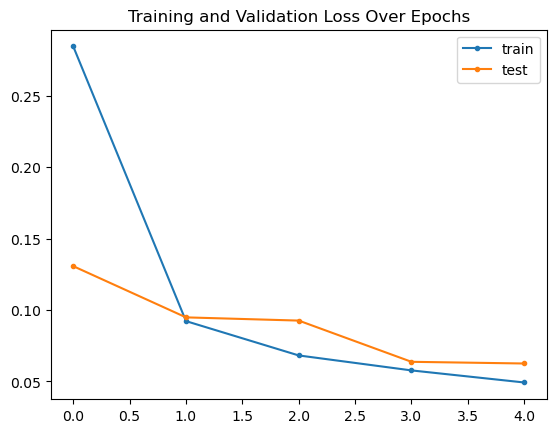

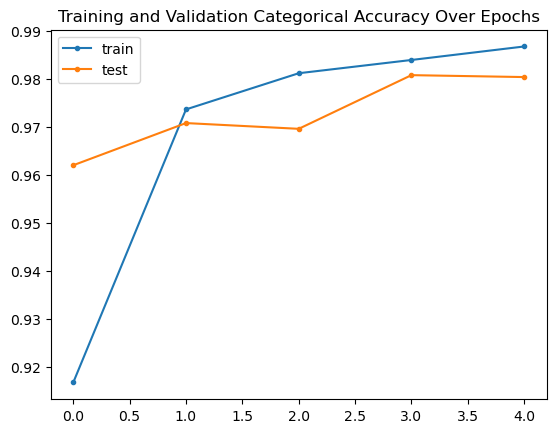

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - categorical_accuracy: 0.9925 - loss: 0.0321


[codecarbon INFO @ 02:06:40] 
Graceful stopping: collecting and writing information.
Please wait a few seconds...
[codecarbon INFO @ 02:06:40] Energy consumed for RAM : 0.014142 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 02:06:40] Energy consumed for all CPUs : 0.001821 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:06:40] 0.015963 kWh of electricity used since the beginning.
/homes/rmeshita/miniconda3/envs/programming_6/lib/python3.12/site-packages/codecarbon/output.py:123: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame.from_records([dict(data.values)])])
[codecarbon INFO @ 02:06:40] Done!



0.03549446538090706 0.9909999966621399


In [11]:
@track_emissions
def simple_model_run(X_train, y_train, call_back_simple, X_validation, y_validation, X_test, y_test):
    # Mid Model
    simple.compile(
        loss= keras.losses.CategoricalCrossentropy(),
        optimizer=keras.optimizers.SGD(),
        metrics=[keras.metrics.CategoricalAccuracy()]
    )
    history = simple.fit(X_train,y_train,
                        epochs=5, batch_size=20,
                        callbacks=[call_back_simple],
                        validation_data=(X_validation,y_validation) )
    #plotting loss 
    plt.plot(history.history['loss'],'.-', label = 'train')
    plt.plot(history.history['val_loss'],'.-', label = 'test')
    plt.title('Training and Validation Loss Over Epochs')
    plt.legend()
    plt.show()

    # plotting categorical accuracy
    plt.plot(history.history['categorical_accuracy'],'.-', label = 'train')
    plt.plot(history.history['val_categorical_accuracy'],'.-', label = 'test')
    plt.legend()
    plt.title('Training and Validation Categorical Accuracy Over Epochs')
    plt.show()
    
    loss_simple,acc_simple = simple.evaluate(X_test,y_test)
    print(loss_simple,acc_simple)

simple_model_run(X_train, y_train, call_back_simple, X_validation, y_validation, X_test, y_test)

[codecarbon INFO @ 02:06:41] [setup] RAM Tracking...
[codecarbon INFO @ 02:06:41] [setup] GPU Tracking...
[codecarbon INFO @ 02:06:41] No GPU found.
[codecarbon INFO @ 02:06:41] [setup] CPU Tracking...
[codecarbon WARNING @ 02:06:41] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 02:06:42] We saw that you have a Intel(R) Xeon(R) Gold 6248 CPU @ 2.50GHz but we don't know it. Please contact us.
[codecarbon INFO @ 02:06:42] CPU Model on constant consumption mode: Intel(R) Xeon(R) Gold 6248 CPU @ 2.50GHz
[codecarbon INFO @ 02:06:42] >>> Tracker's metadata:
[codecarbon INFO @ 02:06:42]   Platform system: Linux-6.1.0-31-amd64-x86_64-with-glibc2.36
[codecarbon INFO @ 02:06:42]   Python version: 3.12.3
[codecarbon INFO @ 02:06:42]   CodeCarbon version: 2.2.2
[codecarbon INFO @ 02:06:42]   Available RAM : 880.353 GB
[codecarbon INFO @ 02:06:42]   CPU count: 80
[codecarbon INFO @ 02:06:42]   CPU model: Intel(R) Xeon(R) Gold 6248 CPU @ 2.50GHz
[codecarbon INF

Epoch 1/5
1270/3000 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - categorical_accuracy: 0.6595 - loss: 1.0465

[codecarbon INFO @ 02:07:00] Energy consumed for RAM : 0.001376 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 02:07:00] Energy consumed for all CPUs : 0.000177 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:07:00] 0.001553 kWh of electricity used since the beginning.


2598/3000 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - categorical_accuracy: 0.7668 - loss: 0.7262

[codecarbon INFO @ 02:07:15] Energy consumed for RAM : 0.002751 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 02:07:15] Energy consumed for all CPUs : 0.000354 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:07:15] 0.003105 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 36s 12ms/step - categorical_accuracy: 0.7847 - loss: 0.6722 - val_categorical_accuracy: 0.9564 - val_loss: 0.1348
Epoch 2/5
 767/3000 ━━━━━━━━━━━━━━━━━━━━ 25s 11ms/step - categorical_accuracy: 0.9698 - loss: 0.0995

[codecarbon INFO @ 02:07:30] Energy consumed for RAM : 0.004126 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 02:07:30] Energy consumed for all CPUs : 0.000531 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:07:30] 0.004658 kWh of electricity used since the beginning.


2097/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - categorical_accuracy: 0.9719 - loss: 0.0931

[codecarbon INFO @ 02:07:45] Energy consumed for RAM : 0.005502 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 02:07:45] Energy consumed for all CPUs : 0.000708 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:07:45] 0.006210 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 35s 12ms/step - categorical_accuracy: 0.9726 - loss: 0.0914 - val_categorical_accuracy: 0.9752 - val_loss: 0.0804
Epoch 3/5
 287/3000 ━━━━━━━━━━━━━━━━━━━━ 30s 11ms/step - categorical_accuracy: 0.9789 - loss: 0.0622

[codecarbon INFO @ 02:08:00] Energy consumed for RAM : 0.006877 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 02:08:00] Energy consumed for all CPUs : 0.000885 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:08:00] 0.007762 kWh of electricity used since the beginning.


1610/3000 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - categorical_accuracy: 0.9808 - loss: 0.0627

[codecarbon INFO @ 02:08:15] Energy consumed for RAM : 0.008252 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 02:08:15] Energy consumed for all CPUs : 0.001062 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:08:15] 0.009314 kWh of electricity used since the beginning.


2939/3000 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - categorical_accuracy: 0.9812 - loss: 0.0625

[codecarbon INFO @ 02:08:30] Energy consumed for RAM : 0.009627 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 02:08:30] Energy consumed for all CPUs : 0.001240 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:08:30] 0.010867 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 36s 12ms/step - categorical_accuracy: 0.9813 - loss: 0.0625 - val_categorical_accuracy: 0.9788 - val_loss: 0.0635
Epoch 4/5
1127/3000 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - categorical_accuracy: 0.9874 - loss: 0.0471

[codecarbon INFO @ 02:08:45] Energy consumed for RAM : 0.011002 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 02:08:45] Energy consumed for all CPUs : 0.001417 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:08:45] 0.012419 kWh of electricity used since the beginning.


2457/3000 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - categorical_accuracy: 0.9868 - loss: 0.0482

[codecarbon INFO @ 02:09:00] Energy consumed for RAM : 0.012377 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 02:09:00] Energy consumed for all CPUs : 0.001594 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:09:00] 0.013971 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 35s 12ms/step - categorical_accuracy: 0.9867 - loss: 0.0482 - val_categorical_accuracy: 0.9788 - val_loss: 0.0653
Epoch 5/5
 651/3000 ━━━━━━━━━━━━━━━━━━━━ 26s 11ms/step - categorical_accuracy: 0.9881 - loss: 0.0405

[codecarbon INFO @ 02:09:15] Energy consumed for RAM : 0.013753 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 02:09:15] Energy consumed for all CPUs : 0.001771 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:09:15] 0.015523 kWh of electricity used since the beginning.


1983/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - categorical_accuracy: 0.9889 - loss: 0.0389

[codecarbon INFO @ 02:09:30] Energy consumed for RAM : 0.015128 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 02:09:30] Energy consumed for all CPUs : 0.001948 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:09:30] 0.017076 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 35s 12ms/step - categorical_accuracy: 0.9889 - loss: 0.0392 - val_categorical_accuracy: 0.9782 - val_loss: 0.0707


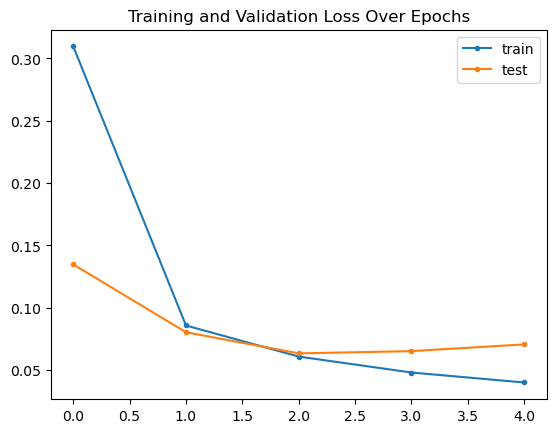

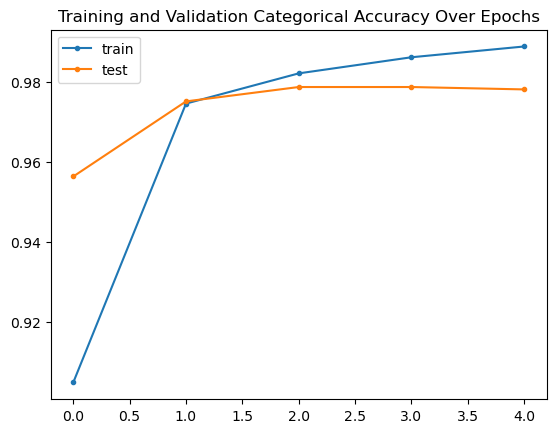

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - categorical_accuracy: 0.9904 - loss: 0.0297


[codecarbon INFO @ 02:09:44] 
Graceful stopping: collecting and writing information.
Please wait a few seconds...
[codecarbon INFO @ 02:09:44] Energy consumed for RAM : 0.016442 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 02:09:44] Energy consumed for all CPUs : 0.002117 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:09:44] 0.018559 kWh of electricity used since the beginning.
[codecarbon INFO @ 02:09:44] Done!



0.02896934747695923 0.9905999898910522


In [12]:
@track_emissions
def mid_model_run(X_train, y_train, call_back_mid, X_validation, y_validation, X_test, y_test):
# Mid Model
    mid.compile(
        loss= keras.losses.CategoricalCrossentropy(),
        optimizer=keras.optimizers.SGD(),
        metrics=[keras.metrics.CategoricalAccuracy()]
    )
    mid_history = mid.fit(X_train,y_train,
                        epochs=5, batch_size=20,
                        callbacks=[call_back_mid],
                        validation_data=(X_validation,y_validation))
    #plotting loss 
    plt.plot(mid_history.history['loss'],'.-', label = 'train')
    plt.plot(mid_history.history['val_loss'],'.-', label = 'test')
    plt.title('Training and Validation Loss Over Epochs')
    plt.legend()
    plt.show()

    # plotting categorical accuracy
    plt.plot(mid_history.history['categorical_accuracy'],'.-', label = 'train')
    plt.plot(mid_history.history['val_categorical_accuracy'],'.-', label = 'test')
    plt.legend()
    plt.title('Training and Validation Categorical Accuracy Over Epochs')
    plt.show()
    
    loss_mid,acc_mid = mid.evaluate(X_test,y_test)
    print(loss_mid,acc_mid)

mid_model_run(X_train, y_train, call_back_mid, X_validation, y_validation, X_test, y_test)

[codecarbon INFO @ 02:10:53] [setup] RAM Tracking...
[codecarbon INFO @ 02:10:53] [setup] GPU Tracking...
[codecarbon INFO @ 02:10:53] No GPU found.
[codecarbon INFO @ 02:10:53] [setup] CPU Tracking...
[codecarbon WARNING @ 02:10:53] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 02:10:55] We saw that you have a Intel(R) Xeon(R) Gold 6248 CPU @ 2.50GHz but we don't know it. Please contact us.
[codecarbon INFO @ 02:10:55] CPU Model on constant consumption mode: Intel(R) Xeon(R) Gold 6248 CPU @ 2.50GHz
[codecarbon INFO @ 02:10:55] >>> Tracker's metadata:
[codecarbon INFO @ 02:10:55]   Platform system: Linux-6.1.0-31-amd64-x86_64-with-glibc2.36
[codecarbon INFO @ 02:10:55]   Python version: 3.12.3
[codecarbon INFO @ 02:10:55]   CodeCarbon version: 2.2.2
[codecarbon INFO @ 02:10:55]   Available RAM : 880.353 GB
[codecarbon INFO @ 02:10:55]   CPU count: 80
[codecarbon INFO @ 02:10:55]   CPU model: Intel(R) Xeon(R) Gold 6248 CPU @ 2.50GHz
[codecarbon INF

Epoch 1/5
 946/3000 ━━━━━━━━━━━━━━━━━━━━ 31s 15ms/step - categorical_accuracy: 0.4918 - loss: 1.5508

[codecarbon INFO @ 02:11:13] Energy consumed for RAM : 0.001376 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 02:11:13] Energy consumed for all CPUs : 0.000177 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:11:13] 0.001553 kWh of electricity used since the beginning.


1949/3000 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - categorical_accuracy: 0.6404 - loss: 1.1060

[codecarbon INFO @ 02:11:28] Energy consumed for RAM : 0.002751 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 02:11:28] Energy consumed for all CPUs : 0.000354 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:11:28] 0.003105 kWh of electricity used since the beginning.


2929/3000 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - categorical_accuracy: 0.7109 - loss: 0.8928

[codecarbon INFO @ 02:11:43] Energy consumed for RAM : 0.004126 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 02:11:43] Energy consumed for all CPUs : 0.000531 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:11:43] 0.004658 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 48s 16ms/step - categorical_accuracy: 0.7147 - loss: 0.8811 - val_categorical_accuracy: 0.9568 - val_loss: 0.1456
Epoch 2/5
 781/3000 ━━━━━━━━━━━━━━━━━━━━ 33s 15ms/step - categorical_accuracy: 0.9677 - loss: 0.1017

[codecarbon INFO @ 02:11:58] Energy consumed for RAM : 0.005501 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 02:11:58] Energy consumed for all CPUs : 0.000708 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:11:58] 0.006209 kWh of electricity used since the beginning.


1772/3000 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - categorical_accuracy: 0.9683 - loss: 0.1016

[codecarbon INFO @ 02:12:13] Energy consumed for RAM : 0.006876 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 02:12:13] Energy consumed for all CPUs : 0.000885 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:12:13] 0.007761 kWh of electricity used since the beginning.


2772/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - categorical_accuracy: 0.9695 - loss: 0.0986

[codecarbon INFO @ 02:12:28] Energy consumed for RAM : 0.008251 kWh. RAM Power : 330.13251399993896 W


2776/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - categorical_accuracy: 0.9695 - loss: 0.0986

[codecarbon INFO @ 02:12:28] Energy consumed for all CPUs : 0.001063 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:12:28] 0.009314 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 47s 16ms/step - categorical_accuracy: 0.9697 - loss: 0.0980 - val_categorical_accuracy: 0.9656 - val_loss: 0.1065
Epoch 3/5
 660/3000 ━━━━━━━━━━━━━━━━━━━━ 35s 15ms/step - categorical_accuracy: 0.9803 - loss: 0.0636

[codecarbon INFO @ 02:12:43] Energy consumed for RAM : 0.009626 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 02:12:43] Energy consumed for all CPUs : 0.001240 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:12:43] 0.010866 kWh of electricity used since the beginning.


1665/3000 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - categorical_accuracy: 0.9800 - loss: 0.0648

[codecarbon INFO @ 02:12:58] Energy consumed for RAM : 0.011001 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 02:12:58] Energy consumed for all CPUs : 0.001417 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:12:58] 0.012418 kWh of electricity used since the beginning.


2638/3000 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - categorical_accuracy: 0.9803 - loss: 0.0644

[codecarbon INFO @ 02:13:13] Energy consumed for RAM : 0.012376 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 02:13:13] Energy consumed for all CPUs : 0.001594 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:13:13] 0.013970 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 47s 16ms/step - categorical_accuracy: 0.9804 - loss: 0.0642 - val_categorical_accuracy: 0.9764 - val_loss: 0.0724
Epoch 4/5
 509/3000 ━━━━━━━━━━━━━━━━━━━━ 37s 15ms/step - categorical_accuracy: 0.9866 - loss: 0.0437

[codecarbon INFO @ 02:13:28] Energy consumed for RAM : 0.013751 kWh. RAM Power : 330.13251399993896 W


 513/3000 ━━━━━━━━━━━━━━━━━━━━ 37s 15ms/step - categorical_accuracy: 0.9866 - loss: 0.0437

[codecarbon INFO @ 02:13:28] Energy consumed for all CPUs : 0.001771 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:13:28] 0.015522 kWh of electricity used since the beginning.


1518/3000 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - categorical_accuracy: 0.9864 - loss: 0.0449

[codecarbon INFO @ 02:13:43] Energy consumed for RAM : 0.015126 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 02:13:43] Energy consumed for all CPUs : 0.001948 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:13:43] 0.017074 kWh of electricity used since the beginning.


2494/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - categorical_accuracy: 0.9863 - loss: 0.0457

[codecarbon INFO @ 02:13:58] Energy consumed for RAM : 0.016501 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 02:13:58] Energy consumed for all CPUs : 0.002125 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:13:58] 0.018626 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 47s 16ms/step - categorical_accuracy: 0.9862 - loss: 0.0460 - val_categorical_accuracy: 0.9754 - val_loss: 0.0769
Epoch 5/5
 385/3000 ━━━━━━━━━━━━━━━━━━━━ 39s 15ms/step - categorical_accuracy: 0.9855 - loss: 0.0551

[codecarbon INFO @ 02:14:13] Energy consumed for RAM : 0.017877 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 02:14:13] Energy consumed for all CPUs : 0.002302 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:14:13] 0.020179 kWh of electricity used since the beginning.


1363/3000 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - categorical_accuracy: 0.9880 - loss: 0.0431

[codecarbon INFO @ 02:14:28] Energy consumed for RAM : 0.019252 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 02:14:28] Energy consumed for all CPUs : 0.002479 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:14:28] 0.021731 kWh of electricity used since the beginning.


2339/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - categorical_accuracy: 0.9884 - loss: 0.0410

[codecarbon INFO @ 02:14:43] Energy consumed for RAM : 0.020627 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 02:14:43] Energy consumed for all CPUs : 0.002656 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:14:43] 0.023283 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 47s 16ms/step - categorical_accuracy: 0.9885 - loss: 0.0404 - val_categorical_accuracy: 0.9836 - val_loss: 0.0593


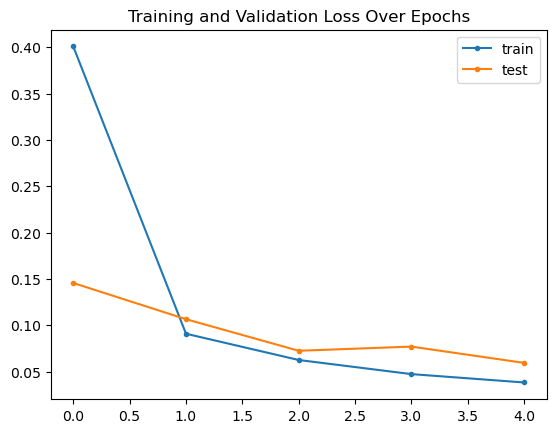

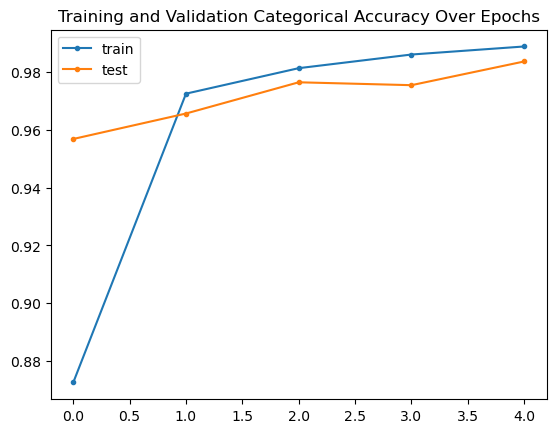

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - categorical_accuracy: 0.9929 - loss: 0.0255


[codecarbon INFO @ 02:14:56] 
Graceful stopping: collecting and writing information.
Please wait a few seconds...
[codecarbon INFO @ 02:14:56] Energy consumed for RAM : 0.021844 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 02:14:56] Energy consumed for all CPUs : 0.002813 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:14:56] 0.024657 kWh of electricity used since the beginning.
[codecarbon INFO @ 02:14:56] Done!



0.026455562561750412 0.9932000041007996


In [13]:

@track_emissions
def large_model_run(X_train, y_train, call_back_large, X_validation, y_validation, X_test, y_test):
    # Large Model
    large.compile(
        loss= keras.losses.CategoricalCrossentropy(),
        optimizer=keras.optimizers.SGD(),
        metrics=[keras.metrics.CategoricalAccuracy()]
    )
    large_history = large.fit(X_train,y_train,
                    epochs=5, batch_size=20,
                    callbacks=[call_back_large],
                    validation_data=(X_validation,y_validation))
    
    #plotting loss 
    plt.plot(large_history.history['loss'],'.-', label = 'train')
    plt.plot(large_history.history['val_loss'],'.-', label = 'test')
    plt.title('Training and Validation Loss Over Epochs')
    plt.legend()
    plt.show()

    # plotting categorical accuracy
    plt.plot(large_history.history['categorical_accuracy'],'.-', label = 'train')
    plt.plot(large_history.history['val_categorical_accuracy'],'.-', label = 'test')
    plt.title('Training and Validation Categorical Accuracy Over Epochs')
    plt.legend()
    plt.show()

    loss_large,acc_large = large.evaluate(X_test,y_test)
    print(loss_large,acc_large)
large_model_run(X_train, y_train, call_back_large, X_validation, y_validation, X_test, y_test)

# Experiment 2:  Effect of learning rate hyperparameter on carbon emission

[codecarbon INFO @ 02:58:02] [setup] RAM Tracking...
[codecarbon INFO @ 02:58:02] [setup] GPU Tracking...
[codecarbon INFO @ 02:58:02] No GPU found.
[codecarbon INFO @ 02:58:02] [setup] CPU Tracking...
[codecarbon WARNING @ 02:58:02] No CPU tracking mode found. Falling back on CPU constant mode.


Learning rate: 1e-10


[codecarbon WARNING @ 02:58:04] We saw that you have a Intel(R) Xeon(R) Gold 6248 CPU @ 2.50GHz but we don't know it. Please contact us.
[codecarbon INFO @ 02:58:04] CPU Model on constant consumption mode: Intel(R) Xeon(R) Gold 6248 CPU @ 2.50GHz
[codecarbon INFO @ 02:58:04] >>> Tracker's metadata:
[codecarbon INFO @ 02:58:04]   Platform system: Linux-6.1.0-31-amd64-x86_64-with-glibc2.36
[codecarbon INFO @ 02:58:04]   Python version: 3.12.3
[codecarbon INFO @ 02:58:04]   CodeCarbon version: 2.2.2
[codecarbon INFO @ 02:58:04]   Available RAM : 880.353 GB
[codecarbon INFO @ 02:58:04]   CPU count: 80
[codecarbon INFO @ 02:58:04]   CPU model: Intel(R) Xeon(R) Gold 6248 CPU @ 2.50GHz
[codecarbon INFO @ 02:58:04]   GPU count: None
[codecarbon INFO @ 02:58:04]   GPU model: None


Epoch 1/10
1521/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - categorical_accuracy: 0.9966 - loss: 0.0241

[codecarbon INFO @ 02:58:22] Energy consumed for RAM : 0.001376 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 02:58:22] Energy consumed for all CPUs : 0.000177 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:58:22] 0.001553 kWh of electricity used since the beginning.


2997/3000 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - categorical_accuracy: 0.9966 - loss: 0.0239

[codecarbon INFO @ 02:58:37] Energy consumed for RAM : 0.002751 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 02:58:37] Energy consumed for all CPUs : 0.000354 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:58:37] 0.003105 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 31s 10ms/step - categorical_accuracy: 0.9966 - loss: 0.0239 - val_categorical_accuracy: 0.9876 - val_loss: 0.0503
Epoch 2/10
1496/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - categorical_accuracy: 0.9964 - loss: 0.0240

[codecarbon INFO @ 02:58:52] Energy consumed for RAM : 0.004126 kWh. RAM Power : 330.13251399993896 W


1502/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - categorical_accuracy: 0.9964 - loss: 0.0240

[codecarbon INFO @ 02:58:52] Energy consumed for all CPUs : 0.000531 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:58:52] 0.004657 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - categorical_accuracy: 0.9964 - loss: 0.0242

[codecarbon INFO @ 02:59:07] Energy consumed for RAM : 0.005501 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 02:59:07] Energy consumed for all CPUs : 0.000708 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:59:07] 0.006209 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 30s 10ms/step - categorical_accuracy: 0.9964 - loss: 0.0242 - val_categorical_accuracy: 0.9876 - val_loss: 0.0503
Epoch 3/10
1512/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - categorical_accuracy: 0.9960 - loss: 0.0244

[codecarbon INFO @ 02:59:22] Energy consumed for RAM : 0.006876 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 02:59:22] Energy consumed for all CPUs : 0.000885 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:59:22] 0.007761 kWh of electricity used since the beginning.


2997/3000 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - categorical_accuracy: 0.9963 - loss: 0.0241

[codecarbon INFO @ 02:59:37] Energy consumed for RAM : 0.008251 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 02:59:37] Energy consumed for all CPUs : 0.001062 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:59:37] 0.009314 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 30s 10ms/step - categorical_accuracy: 0.9963 - loss: 0.0241 - val_categorical_accuracy: 0.9876 - val_loss: 0.0503
Epoch 3: early stopping
Restoring model weights from the end of the best epoch: 1.


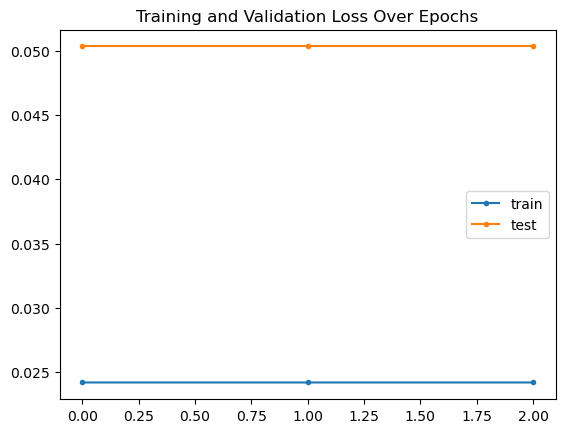

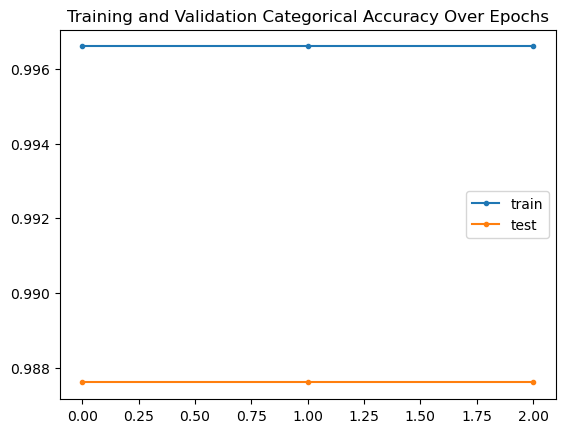

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - categorical_accuracy: 0.9974 - loss: 0.0205


[codecarbon INFO @ 02:59:39] 
Graceful stopping: collecting and writing information.
Please wait a few seconds...
[codecarbon INFO @ 02:59:39] Energy consumed for RAM : 0.008402 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 02:59:39] Energy consumed for all CPUs : 0.001082 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:59:39] 0.009483 kWh of electricity used since the beginning.
[codecarbon INFO @ 02:59:39] Done!

[codecarbon INFO @ 02:59:39] [setup] RAM Tracking...
[codecarbon INFO @ 02:59:39] [setup] GPU Tracking...
[codecarbon INFO @ 02:59:39] No GPU found.
[codecarbon INFO @ 02:59:39] [setup] CPU Tracking...
[codecarbon WARNING @ 02:59:39] No CPU tracking mode found. Falling back on CPU constant mode.


Loss: 0.023579629138112068, Accuracy: 0.9968000054359436
Learning rate: 1e-05


[codecarbon WARNING @ 02:59:40] We saw that you have a Intel(R) Xeon(R) Gold 6248 CPU @ 2.50GHz but we don't know it. Please contact us.
[codecarbon INFO @ 02:59:40] CPU Model on constant consumption mode: Intel(R) Xeon(R) Gold 6248 CPU @ 2.50GHz
[codecarbon INFO @ 02:59:40] >>> Tracker's metadata:
[codecarbon INFO @ 02:59:40]   Platform system: Linux-6.1.0-31-amd64-x86_64-with-glibc2.36
[codecarbon INFO @ 02:59:40]   Python version: 3.12.3
[codecarbon INFO @ 02:59:40]   CodeCarbon version: 2.2.2
[codecarbon INFO @ 02:59:40]   Available RAM : 880.353 GB
[codecarbon INFO @ 02:59:40]   CPU count: 80
[codecarbon INFO @ 02:59:40]   CPU model: Intel(R) Xeon(R) Gold 6248 CPU @ 2.50GHz
[codecarbon INFO @ 02:59:40]   GPU count: None
[codecarbon INFO @ 02:59:40]   GPU model: None


Epoch 1/10
1521/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - categorical_accuracy: 0.9972 - loss: 0.0225

[codecarbon INFO @ 02:59:58] Energy consumed for RAM : 0.001376 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 02:59:58] Energy consumed for all CPUs : 0.000177 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:59:58] 0.001553 kWh of electricity used since the beginning.


2995/3000 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - categorical_accuracy: 0.9970 - loss: 0.0233

[codecarbon INFO @ 03:00:13] Energy consumed for RAM : 0.002751 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:00:13] Energy consumed for all CPUs : 0.000354 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:00:13] 0.003105 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 31s 10ms/step - categorical_accuracy: 0.9970 - loss: 0.0233 - val_categorical_accuracy: 0.9876 - val_loss: 0.0503
Epoch 2/10
1428/3000 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - categorical_accuracy: 0.9957 - loss: 0.0242

[codecarbon INFO @ 03:00:28] Energy consumed for RAM : 0.004126 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:00:28] Energy consumed for all CPUs : 0.000531 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:00:28] 0.004657 kWh of electricity used since the beginning.


2978/3000 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - categorical_accuracy: 0.9962 - loss: 0.0240

[codecarbon INFO @ 03:00:43] Energy consumed for RAM : 0.005501 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:00:43] Energy consumed for all CPUs : 0.000708 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:00:43] 0.006210 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 31s 10ms/step - categorical_accuracy: 0.9962 - loss: 0.0240 - val_categorical_accuracy: 0.9876 - val_loss: 0.0503
Epoch 3/10
1377/3000 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - categorical_accuracy: 0.9957 - loss: 0.0261

[codecarbon INFO @ 03:00:58] Energy consumed for RAM : 0.006876 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:00:58] Energy consumed for all CPUs : 0.000885 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:00:58] 0.007762 kWh of electricity used since the beginning.


2911/3000 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - categorical_accuracy: 0.9962 - loss: 0.0252

[codecarbon INFO @ 03:01:13] Energy consumed for RAM : 0.008252 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:01:13] Energy consumed for all CPUs : 0.001062 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:01:13] 0.009314 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 31s 10ms/step - categorical_accuracy: 0.9962 - loss: 0.0252 - val_categorical_accuracy: 0.9876 - val_loss: 0.0503
Epoch 4/10
1328/3000 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - categorical_accuracy: 0.9967 - loss: 0.0248

[codecarbon INFO @ 03:01:28] Energy consumed for RAM : 0.009627 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:01:28] Energy consumed for all CPUs : 0.001240 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:01:28] 0.010866 kWh of electricity used since the beginning.


2896/3000 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - categorical_accuracy: 0.9966 - loss: 0.0246

[codecarbon INFO @ 03:01:43] Energy consumed for RAM : 0.011002 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:01:43] Energy consumed for all CPUs : 0.001417 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:01:43] 0.012418 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 30s 10ms/step - categorical_accuracy: 0.9966 - loss: 0.0246 - val_categorical_accuracy: 0.9876 - val_loss: 0.0503
Epoch 5/10
1281/3000 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - categorical_accuracy: 0.9969 - loss: 0.0251

[codecarbon INFO @ 03:01:58] Energy consumed for RAM : 0.012377 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:01:58] Energy consumed for all CPUs : 0.001594 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:01:58] 0.013971 kWh of electricity used since the beginning.


2832/3000 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - categorical_accuracy: 0.9967 - loss: 0.0248

[codecarbon INFO @ 03:02:13] Energy consumed for RAM : 0.013752 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:02:13] Energy consumed for all CPUs : 0.001771 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:02:13] 0.015523 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 31s 10ms/step - categorical_accuracy: 0.9967 - loss: 0.0247 - val_categorical_accuracy: 0.9876 - val_loss: 0.0503
Epoch 6/10
1248/3000 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - categorical_accuracy: 0.9972 - loss: 0.0231

[codecarbon INFO @ 03:02:28] Energy consumed for RAM : 0.015127 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:02:28] Energy consumed for all CPUs : 0.001948 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:02:28] 0.017075 kWh of electricity used since the beginning.


2803/3000 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - categorical_accuracy: 0.9969 - loss: 0.0237

[codecarbon INFO @ 03:02:43] Energy consumed for RAM : 0.016502 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:02:43] Energy consumed for all CPUs : 0.002125 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:02:43] 0.018627 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 30s 10ms/step - categorical_accuracy: 0.9969 - loss: 0.0237 - val_categorical_accuracy: 0.9876 - val_loss: 0.0503
Epoch 7/10
1201/3000 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - categorical_accuracy: 0.9974 - loss: 0.0227

[codecarbon INFO @ 03:02:58] Energy consumed for RAM : 0.017878 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:02:58] Energy consumed for all CPUs : 0.002302 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:02:58] 0.020180 kWh of electricity used since the beginning.


2732/3000 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - categorical_accuracy: 0.9971 - loss: 0.0233

[codecarbon INFO @ 03:03:13] Energy consumed for RAM : 0.019253 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:03:13] Energy consumed for all CPUs : 0.002479 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:03:13] 0.021732 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 31s 10ms/step - categorical_accuracy: 0.9971 - loss: 0.0234 - val_categorical_accuracy: 0.9876 - val_loss: 0.0503
Epoch 8/10
1120/3000 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - categorical_accuracy: 0.9973 - loss: 0.0234

[codecarbon INFO @ 03:03:28] Energy consumed for RAM : 0.020628 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:03:28] Energy consumed for all CPUs : 0.002656 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:03:28] 0.023284 kWh of electricity used since the beginning.


2650/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - categorical_accuracy: 0.9971 - loss: 0.0234

[codecarbon INFO @ 03:03:43] Energy consumed for RAM : 0.022003 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:03:43] Energy consumed for all CPUs : 0.002833 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:03:43] 0.024837 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 31s 10ms/step - categorical_accuracy: 0.9970 - loss: 0.0235 - val_categorical_accuracy: 0.9876 - val_loss: 0.0503
Epoch 9/10
1038/3000 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - categorical_accuracy: 0.9970 - loss: 0.0227

[codecarbon INFO @ 03:03:58] Energy consumed for RAM : 0.023379 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:03:58] Energy consumed for all CPUs : 0.003010 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:03:58] 0.026389 kWh of electricity used since the beginning.


2557/3000 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - categorical_accuracy: 0.9970 - loss: 0.0232

[codecarbon INFO @ 03:04:13] Energy consumed for RAM : 0.024754 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:04:13] Energy consumed for all CPUs : 0.003187 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:04:13] 0.027941 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 31s 10ms/step - categorical_accuracy: 0.9970 - loss: 0.0233 - val_categorical_accuracy: 0.9876 - val_loss: 0.0503
Epoch 10/10
 954/3000 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - categorical_accuracy: 0.9963 - loss: 0.0254

[codecarbon INFO @ 03:04:28] Energy consumed for RAM : 0.026129 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:04:28] Energy consumed for all CPUs : 0.003364 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:04:28] 0.029493 kWh of electricity used since the beginning.


2485/3000 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - categorical_accuracy: 0.9964 - loss: 0.0249

[codecarbon INFO @ 03:04:43] Energy consumed for RAM : 0.027504 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:04:43] Energy consumed for all CPUs : 0.003541 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:04:43] 0.031046 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 31s 10ms/step - categorical_accuracy: 0.9964 - loss: 0.0248 - val_categorical_accuracy: 0.9876 - val_loss: 0.0503
Restoring model weights from the end of the best epoch: 10.


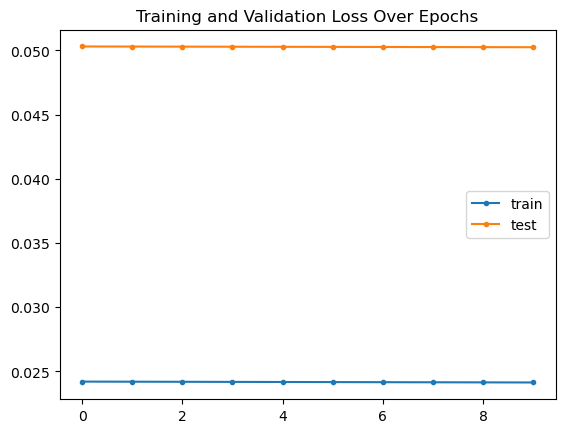

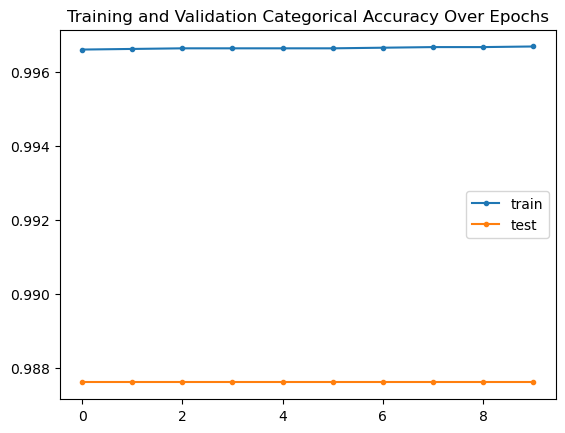

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - categorical_accuracy: 0.9974 - loss: 0.0205


[codecarbon INFO @ 03:04:51] 
Graceful stopping: collecting and writing information.
Please wait a few seconds...
[codecarbon INFO @ 03:04:51] Energy consumed for RAM : 0.028210 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:04:51] Energy consumed for all CPUs : 0.003632 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:04:51] 0.031842 kWh of electricity used since the beginning.


Loss: 0.023551970720291138, Accuracy: 0.9968000054359436


[codecarbon INFO @ 03:04:51] Done!

[codecarbon INFO @ 03:04:51] [setup] RAM Tracking...
[codecarbon INFO @ 03:04:51] [setup] GPU Tracking...
[codecarbon INFO @ 03:04:51] No GPU found.
[codecarbon INFO @ 03:04:51] [setup] CPU Tracking...
[codecarbon WARNING @ 03:04:51] No CPU tracking mode found. Falling back on CPU constant mode.


Learning rate: 0.30000000000000004


[codecarbon WARNING @ 03:04:52] We saw that you have a Intel(R) Xeon(R) Gold 6248 CPU @ 2.50GHz but we don't know it. Please contact us.
[codecarbon INFO @ 03:04:52] CPU Model on constant consumption mode: Intel(R) Xeon(R) Gold 6248 CPU @ 2.50GHz
[codecarbon INFO @ 03:04:52] >>> Tracker's metadata:
[codecarbon INFO @ 03:04:52]   Platform system: Linux-6.1.0-31-amd64-x86_64-with-glibc2.36
[codecarbon INFO @ 03:04:52]   Python version: 3.12.3
[codecarbon INFO @ 03:04:52]   CodeCarbon version: 2.2.2
[codecarbon INFO @ 03:04:52]   Available RAM : 880.353 GB
[codecarbon INFO @ 03:04:52]   CPU count: 80
[codecarbon INFO @ 03:04:52]   CPU model: Intel(R) Xeon(R) Gold 6248 CPU @ 2.50GHz
[codecarbon INFO @ 03:04:52]   GPU count: None
[codecarbon INFO @ 03:04:52]   GPU model: None


Epoch 1/10
1486/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - categorical_accuracy: 0.1811 - loss: 2.5051

[codecarbon INFO @ 03:05:10] Energy consumed for RAM : 0.001376 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:05:10] Energy consumed for all CPUs : 0.000177 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:05:10] 0.001553 kWh of electricity used since the beginning.


2995/3000 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - categorical_accuracy: 0.1484 - loss: 2.4889

[codecarbon INFO @ 03:05:25] Energy consumed for RAM : 0.002751 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:05:25] Energy consumed for all CPUs : 0.000354 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:05:25] 0.003105 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 31s 10ms/step - categorical_accuracy: 0.1484 - loss: 2.4889 - val_categorical_accuracy: 0.1142 - val_loss: 2.4281
Epoch 2/10
1434/3000 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - categorical_accuracy: 0.1043 - loss: 2.4223

[codecarbon INFO @ 03:05:40] Energy consumed for RAM : 0.004126 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:05:40] Energy consumed for all CPUs : 0.000531 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:05:40] 0.004657 kWh of electricity used since the beginning.


2990/3000 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - categorical_accuracy: 0.1047 - loss: 2.4171

[codecarbon INFO @ 03:05:55] Energy consumed for RAM : 0.005501 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:05:55] Energy consumed for all CPUs : 0.000708 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:05:55] 0.006209 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 30s 10ms/step - categorical_accuracy: 0.1047 - loss: 2.4171 - val_categorical_accuracy: 0.1024 - val_loss: 2.3912
Epoch 3/10
1405/3000 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - categorical_accuracy: 0.1081 - loss: 2.3863

[codecarbon INFO @ 03:06:10] Energy consumed for RAM : 0.006876 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:06:10] Energy consumed for all CPUs : 0.000885 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:06:10] 0.007762 kWh of electricity used since the beginning.


2962/3000 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - categorical_accuracy: 0.1080 - loss: 2.3826

[codecarbon INFO @ 03:06:25] Energy consumed for RAM : 0.008252 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:06:25] Energy consumed for all CPUs : 0.001062 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:06:25] 0.009314 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 30s 10ms/step - categorical_accuracy: 0.1080 - loss: 2.3825 - val_categorical_accuracy: 0.0924 - val_loss: 2.3630
Epoch 4/10
1375/3000 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - categorical_accuracy: 0.1039 - loss: 2.3617

[codecarbon INFO @ 03:06:40] Energy consumed for RAM : 0.009627 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:06:40] Energy consumed for all CPUs : 0.001240 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:06:40] 0.010866 kWh of electricity used since the beginning.


2929/3000 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - categorical_accuracy: 0.1037 - loss: 2.3590

[codecarbon INFO @ 03:06:55] Energy consumed for RAM : 0.011002 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:06:55] Energy consumed for all CPUs : 0.001417 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:06:55] 0.012419 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 30s 10ms/step - categorical_accuracy: 0.1037 - loss: 2.3589 - val_categorical_accuracy: 0.1142 - val_loss: 2.3425
Epoch 5/10
1348/3000 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - categorical_accuracy: 0.1053 - loss: 2.3438

[codecarbon INFO @ 03:07:10] Energy consumed for RAM : 0.012377 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:07:10] Energy consumed for all CPUs : 0.001594 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:07:10] 0.013971 kWh of electricity used since the beginning.


2903/3000 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - categorical_accuracy: 0.1050 - loss: 2.3418

[codecarbon INFO @ 03:07:25] Energy consumed for RAM : 0.013753 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:07:25] Energy consumed for all CPUs : 0.001771 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:07:25] 0.015523 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 30s 10ms/step - categorical_accuracy: 0.1050 - loss: 2.3417 - val_categorical_accuracy: 0.1142 - val_loss: 2.3315
Epoch 6/10
1311/3000 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - categorical_accuracy: 0.1035 - loss: 2.3324

[codecarbon INFO @ 03:07:40] Energy consumed for RAM : 0.015128 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:07:40] Energy consumed for all CPUs : 0.001948 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:07:40] 0.017075 kWh of electricity used since the beginning.


2872/3000 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - categorical_accuracy: 0.1042 - loss: 2.3307

[codecarbon INFO @ 03:07:55] Energy consumed for RAM : 0.016503 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:07:55] Energy consumed for all CPUs : 0.002125 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:07:55] 0.018628 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 30s 10ms/step - categorical_accuracy: 0.1042 - loss: 2.3306 - val_categorical_accuracy: 0.1024 - val_loss: 2.3232
Epoch 7/10
1289/3000 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - categorical_accuracy: 0.1049 - loss: 2.3233

[codecarbon INFO @ 03:08:10] Energy consumed for RAM : 0.017878 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:08:10] Energy consumed for all CPUs : 0.002302 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:08:10] 0.020180 kWh of electricity used since the beginning.


2837/3000 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - categorical_accuracy: 0.1054 - loss: 2.3225

[codecarbon INFO @ 03:08:25] Energy consumed for RAM : 0.019253 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:08:25] Energy consumed for all CPUs : 0.002479 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:08:25] 0.021732 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 30s 10ms/step - categorical_accuracy: 0.1055 - loss: 2.3224 - val_categorical_accuracy: 0.1024 - val_loss: 2.3194
Epoch 8/10
1261/3000 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - categorical_accuracy: 0.1063 - loss: 2.3180

[codecarbon INFO @ 03:08:40] Energy consumed for RAM : 0.020629 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:08:40] Energy consumed for all CPUs : 0.002656 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:08:40] 0.023285 kWh of electricity used since the beginning.


2815/3000 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - categorical_accuracy: 0.1053 - loss: 2.3172

[codecarbon INFO @ 03:08:55] Energy consumed for RAM : 0.022004 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:08:55] Energy consumed for all CPUs : 0.002833 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:08:55] 0.024837 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 30s 10ms/step - categorical_accuracy: 0.1053 - loss: 2.3171 - val_categorical_accuracy: 0.1024 - val_loss: 2.3159
Epoch 9/10
1238/3000 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - categorical_accuracy: 0.1074 - loss: 2.3129

[codecarbon INFO @ 03:09:10] Energy consumed for RAM : 0.023379 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:09:10] Energy consumed for all CPUs : 0.003010 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:09:10] 0.026389 kWh of electricity used since the beginning.


2795/3000 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - categorical_accuracy: 0.1057 - loss: 2.3128

[codecarbon INFO @ 03:09:25] Energy consumed for RAM : 0.024754 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:09:25] Energy consumed for all CPUs : 0.003187 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:09:25] 0.027941 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 30s 10ms/step - categorical_accuracy: 0.1056 - loss: 2.3128 - val_categorical_accuracy: 0.1000 - val_loss: 2.3124
Epoch 10/10
1212/3000 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - categorical_accuracy: 0.1061 - loss: 2.3110

[codecarbon INFO @ 03:09:40] Energy consumed for RAM : 0.026129 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:09:40] Energy consumed for all CPUs : 0.003364 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:09:40] 0.029494 kWh of electricity used since the beginning.


2769/3000 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - categorical_accuracy: 0.1059 - loss: 2.3107

[codecarbon INFO @ 03:09:55] Energy consumed for RAM : 0.027505 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:09:55] Energy consumed for all CPUs : 0.003541 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:09:55] 0.031046 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 30s 10ms/step - categorical_accuracy: 0.1059 - loss: 2.3107 - val_categorical_accuracy: 0.1000 - val_loss: 2.3072
Restoring model weights from the end of the best epoch: 10.


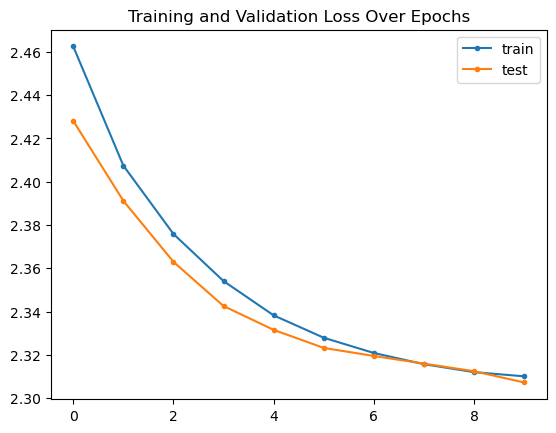

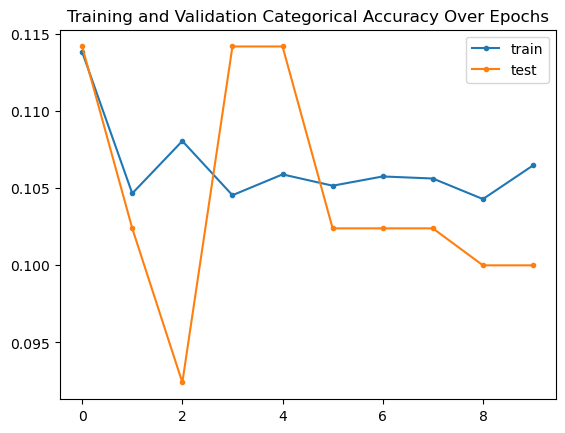

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - categorical_accuracy: 0.1002 - loss: 2.3072


[codecarbon INFO @ 03:10:00] 
Graceful stopping: collecting and writing information.
Please wait a few seconds...
[codecarbon INFO @ 03:10:00] Energy consumed for RAM : 0.027951 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:10:00] Energy consumed for all CPUs : 0.003599 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:10:00] 0.031549 kWh of electricity used since the beginning.


Loss: 2.306910276412964, Accuracy: 0.10199999809265137


[codecarbon INFO @ 03:10:00] Done!



In [17]:
@track_emissions
def simple_model_run(X_train, y_train, call_back_simple, X_validation, y_validation, X_test, y_test, l_rate):
    # Mid Model
    simple.compile(
        loss= keras.losses.CategoricalCrossentropy(),
        optimizer=keras.optimizers.SGD(learning_rate=l_rate),
        metrics=[keras.metrics.CategoricalAccuracy()]
    )
    history = simple.fit(X_train,y_train,
                        epochs=10, batch_size=20,
                        callbacks=[early_stopping, call_back_simple],
                        validation_data=(X_validation,y_validation) )
    #plotting loss 
    plt.plot(history.history['loss'],'.-', label = 'train')
    plt.plot(history.history['val_loss'],'.-', label = 'test')
    plt.title('Training and Validation Loss Over Epochs')
    plt.legend()
    plt.show()

    # plotting categorical accuracy
    plt.plot(history.history['categorical_accuracy'],'.-', label = 'train')
    plt.plot(history.history['val_categorical_accuracy'],'.-', label = 'test')
    plt.legend()
    plt.title('Training and Validation Categorical Accuracy Over Epochs')
    plt.show()
    
    loss_simple,acc_simple = simple.evaluate(X_test,y_test)
    print(f'Loss: {loss_simple}, Accuracy: {acc_simple}')


learning_rate = [1e-10,1e-05,3*1e-1]
for l_rate in learning_rate:
    print(f'Learning rate: {l_rate}')
    simple_model_run(X_train, y_train, call_back_simple, X_validation, y_validation, X_test, y_test, l_rate)



# Experiment 3:  Stochastic vs Adam optimizer

[codecarbon INFO @ 03:25:15] [setup] RAM Tracking...
[codecarbon INFO @ 03:25:15] [setup] GPU Tracking...
[codecarbon INFO @ 03:25:15] No GPU found.
[codecarbon INFO @ 03:25:15] [setup] CPU Tracking...
[codecarbon WARNING @ 03:25:15] No CPU tracking mode found. Falling back on CPU constant mode.


Optimizer name is : Stochastic


[codecarbon WARNING @ 03:25:16] We saw that you have a Intel(R) Xeon(R) Gold 6248 CPU @ 2.50GHz but we don't know it. Please contact us.
[codecarbon INFO @ 03:25:16] CPU Model on constant consumption mode: Intel(R) Xeon(R) Gold 6248 CPU @ 2.50GHz
[codecarbon INFO @ 03:25:16] >>> Tracker's metadata:
[codecarbon INFO @ 03:25:16]   Platform system: Linux-6.1.0-31-amd64-x86_64-with-glibc2.36
[codecarbon INFO @ 03:25:16]   Python version: 3.12.3
[codecarbon INFO @ 03:25:16]   CodeCarbon version: 2.2.2
[codecarbon INFO @ 03:25:16]   Available RAM : 880.353 GB
[codecarbon INFO @ 03:25:16]   CPU count: 80
[codecarbon INFO @ 03:25:16]   CPU model: Intel(R) Xeon(R) Gold 6248 CPU @ 2.50GHz
[codecarbon INFO @ 03:25:16]   GPU count: None
[codecarbon INFO @ 03:25:16]   GPU model: None


Epoch 1/5
1508/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - categorical_accuracy: 0.6971 - loss: 0.9531

[codecarbon INFO @ 03:25:34] Energy consumed for RAM : 0.001376 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:25:34] Energy consumed for all CPUs : 0.000177 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:25:34] 0.001553 kWh of electricity used since the beginning.


2997/3000 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - categorical_accuracy: 0.7917 - loss: 0.6622

[codecarbon INFO @ 03:25:49] Energy consumed for RAM : 0.002751 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:25:49] Energy consumed for all CPUs : 0.000354 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:25:49] 0.003105 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 31s 10ms/step - categorical_accuracy: 0.7919 - loss: 0.6617 - val_categorical_accuracy: 0.9606 - val_loss: 0.1342
Epoch 2/5
1436/3000 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - categorical_accuracy: 0.9729 - loss: 0.0961

[codecarbon INFO @ 03:26:04] Energy consumed for RAM : 0.004126 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:26:04] Energy consumed for all CPUs : 0.000531 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:26:04] 0.004657 kWh of electricity used since the beginning.


2968/3000 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - categorical_accuracy: 0.9735 - loss: 0.0937

[codecarbon INFO @ 03:26:19] Energy consumed for RAM : 0.005501 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:26:19] Energy consumed for all CPUs : 0.000708 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:26:19] 0.006210 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 31s 10ms/step - categorical_accuracy: 0.9735 - loss: 0.0936 - val_categorical_accuracy: 0.9754 - val_loss: 0.0883
Epoch 3/5
1376/3000 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - categorical_accuracy: 0.9807 - loss: 0.0707

[codecarbon INFO @ 03:26:34] Energy consumed for RAM : 0.006877 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:26:34] Energy consumed for all CPUs : 0.000885 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:26:34] 0.007762 kWh of electricity used since the beginning.


2928/3000 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - categorical_accuracy: 0.9810 - loss: 0.0687

[codecarbon INFO @ 03:26:49] Energy consumed for RAM : 0.008252 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:26:49] Energy consumed for all CPUs : 0.001062 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:26:49] 0.009314 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 30s 10ms/step - categorical_accuracy: 0.9811 - loss: 0.0686 - val_categorical_accuracy: 0.9776 - val_loss: 0.0730
Epoch 4/5
1331/3000 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - categorical_accuracy: 0.9854 - loss: 0.0558

[codecarbon INFO @ 03:27:04] Energy consumed for RAM : 0.009627 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:27:04] Energy consumed for all CPUs : 0.001240 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:27:04] 0.010867 kWh of electricity used since the beginning.


2865/3000 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - categorical_accuracy: 0.9850 - loss: 0.0560

[codecarbon INFO @ 03:27:19] Energy consumed for RAM : 0.011002 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:27:19] Energy consumed for all CPUs : 0.001417 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:27:19] 0.012419 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 31s 10ms/step - categorical_accuracy: 0.9850 - loss: 0.0559 - val_categorical_accuracy: 0.9764 - val_loss: 0.0801
Epoch 5/5
1264/3000 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - categorical_accuracy: 0.9870 - loss: 0.0458

[codecarbon INFO @ 03:27:34] Energy consumed for RAM : 0.012378 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:27:34] Energy consumed for all CPUs : 0.001594 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:27:34] 0.013971 kWh of electricity used since the beginning.


2798/3000 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - categorical_accuracy: 0.9870 - loss: 0.0469

[codecarbon INFO @ 03:27:49] Energy consumed for RAM : 0.013753 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:27:49] Energy consumed for all CPUs : 0.001771 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:27:49] 0.015524 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 31s 10ms/step - categorical_accuracy: 0.9870 - loss: 0.0470 - val_categorical_accuracy: 0.9782 - val_loss: 0.0766


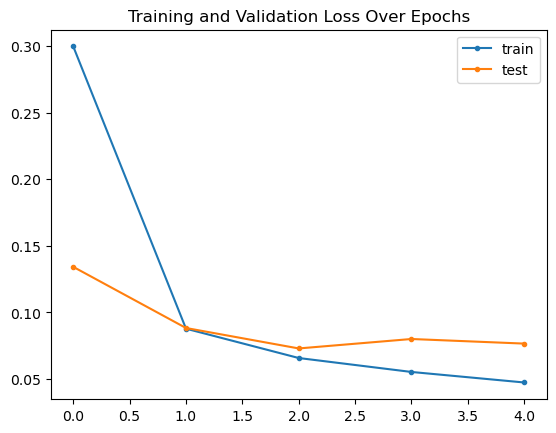

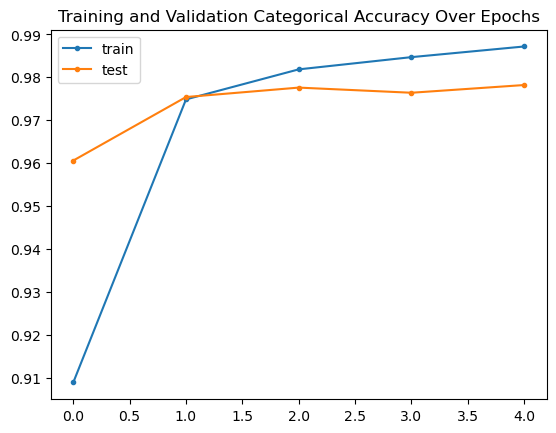

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - categorical_accuracy: 0.9925 - loss: 0.0295


[codecarbon INFO @ 03:27:54] 
Graceful stopping: collecting and writing information.
Please wait a few seconds...
[codecarbon INFO @ 03:27:54] Energy consumed for RAM : 0.014173 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:27:54] Energy consumed for all CPUs : 0.001825 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:27:54] 0.015998 kWh of electricity used since the beginning.
[codecarbon INFO @ 03:27:54] Done!

[codecarbon INFO @ 03:27:54] [setup] RAM Tracking...
[codecarbon INFO @ 03:27:54] [setup] GPU Tracking...
[codecarbon INFO @ 03:27:54] No GPU found.
[codecarbon INFO @ 03:27:54] [setup] CPU Tracking...
[codecarbon WARNING @ 03:27:54] No CPU tracking mode found. Falling back on CPU constant mode.


Loss: 0.033354416489601135, Accuracy: 0.9922000169754028
Optimizer name is : Adam


[codecarbon WARNING @ 03:27:55] We saw that you have a Intel(R) Xeon(R) Gold 6248 CPU @ 2.50GHz but we don't know it. Please contact us.
[codecarbon INFO @ 03:27:55] CPU Model on constant consumption mode: Intel(R) Xeon(R) Gold 6248 CPU @ 2.50GHz
[codecarbon INFO @ 03:27:55] >>> Tracker's metadata:
[codecarbon INFO @ 03:27:55]   Platform system: Linux-6.1.0-31-amd64-x86_64-with-glibc2.36
[codecarbon INFO @ 03:27:55]   Python version: 3.12.3
[codecarbon INFO @ 03:27:55]   CodeCarbon version: 2.2.2
[codecarbon INFO @ 03:27:55]   Available RAM : 880.353 GB
[codecarbon INFO @ 03:27:55]   CPU count: 80
[codecarbon INFO @ 03:27:55]   CPU model: Intel(R) Xeon(R) Gold 6248 CPU @ 2.50GHz
[codecarbon INFO @ 03:27:55]   GPU count: None
[codecarbon INFO @ 03:27:55]   GPU model: None


Epoch 1/5
1405/3000 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - categorical_accuracy: 0.9721 - loss: 0.0989

[codecarbon INFO @ 03:28:13] Energy consumed for RAM : 0.001376 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:28:13] Energy consumed for all CPUs : 0.000177 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:28:13] 0.001553 kWh of electricity used since the beginning.


2927/3000 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - categorical_accuracy: 0.9745 - loss: 0.0910

[codecarbon INFO @ 03:28:28] Energy consumed for RAM : 0.002751 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:28:28] Energy consumed for all CPUs : 0.000354 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:28:28] 0.003105 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 32s 10ms/step - categorical_accuracy: 0.9746 - loss: 0.0906 - val_categorical_accuracy: 0.9756 - val_loss: 0.0792
Epoch 2/5
1306/3000 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - categorical_accuracy: 0.9858 - loss: 0.0524

[codecarbon INFO @ 03:28:43] Energy consumed for RAM : 0.004126 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:28:43] Energy consumed for all CPUs : 0.000531 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:28:43] 0.004658 kWh of electricity used since the beginning.


2831/3000 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - categorical_accuracy: 0.9863 - loss: 0.0509

[codecarbon INFO @ 03:28:58] Energy consumed for RAM : 0.005502 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:28:58] Energy consumed for all CPUs : 0.000708 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:28:58] 0.006210 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 31s 10ms/step - categorical_accuracy: 0.9864 - loss: 0.0508 - val_categorical_accuracy: 0.9816 - val_loss: 0.0667
Epoch 3/5
1229/3000 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - categorical_accuracy: 0.9926 - loss: 0.0344

[codecarbon INFO @ 03:29:13] Energy consumed for RAM : 0.006877 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:29:13] Energy consumed for all CPUs : 0.000885 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:29:13] 0.007762 kWh of electricity used since the beginning.


2768/3000 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - categorical_accuracy: 0.9914 - loss: 0.0375

[codecarbon INFO @ 03:29:28] Energy consumed for RAM : 0.008252 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:29:28] Energy consumed for all CPUs : 0.001062 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:29:28] 0.009314 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 31s 10ms/step - categorical_accuracy: 0.9913 - loss: 0.0377 - val_categorical_accuracy: 0.9878 - val_loss: 0.0495
Epoch 4/5
1167/3000 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - categorical_accuracy: 0.9924 - loss: 0.0312

[codecarbon INFO @ 03:29:43] Energy consumed for RAM : 0.009627 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:29:43] Energy consumed for all CPUs : 0.001240 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:29:43] 0.010867 kWh of electricity used since the beginning.


2701/3000 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - categorical_accuracy: 0.9922 - loss: 0.0329

[codecarbon INFO @ 03:29:58] Energy consumed for RAM : 0.011002 kWh. RAM Power : 330.13251399993896 W


2707/3000 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - categorical_accuracy: 0.9922 - loss: 0.0329

[codecarbon INFO @ 03:29:58] Energy consumed for all CPUs : 0.001417 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:29:58] 0.012419 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 31s 10ms/step - categorical_accuracy: 0.9922 - loss: 0.0330 - val_categorical_accuracy: 0.9870 - val_loss: 0.0522
Epoch 5/5
1111/3000 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - categorical_accuracy: 0.9947 - loss: 0.0246

[codecarbon INFO @ 03:30:13] Energy consumed for RAM : 0.012377 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:30:13] Energy consumed for all CPUs : 0.001594 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:30:13] 0.013971 kWh of electricity used since the beginning.


2644/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - categorical_accuracy: 0.9943 - loss: 0.0265

[codecarbon INFO @ 03:30:28] Energy consumed for RAM : 0.013752 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:30:28] Energy consumed for all CPUs : 0.001771 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:30:28] 0.015523 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 31s 10ms/step - categorical_accuracy: 0.9942 - loss: 0.0269 - val_categorical_accuracy: 0.9874 - val_loss: 0.0531


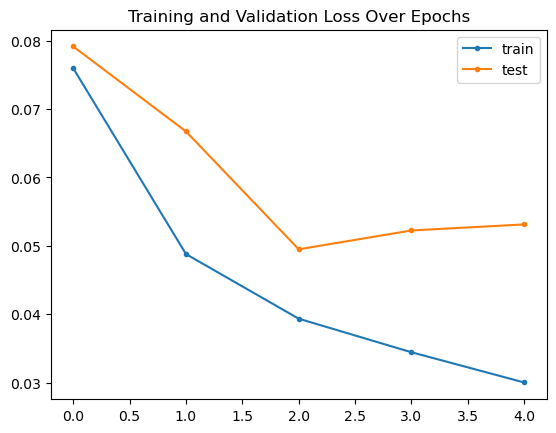

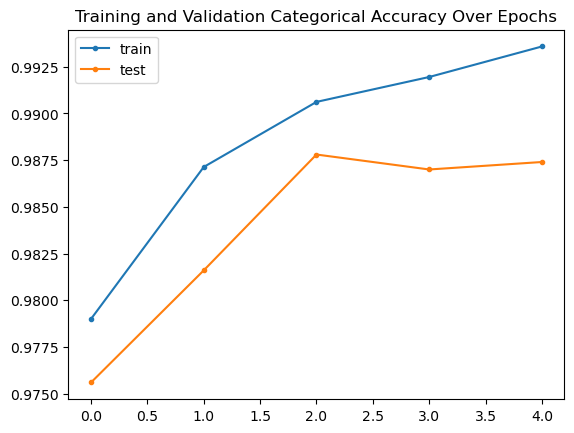

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - categorical_accuracy: 0.9955 - loss: 0.0268


[codecarbon INFO @ 03:30:34] 
Graceful stopping: collecting and writing information.
Please wait a few seconds...
[codecarbon INFO @ 03:30:34] Energy consumed for RAM : 0.014303 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:30:34] Energy consumed for all CPUs : 0.001842 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:30:34] 0.016145 kWh of electricity used since the beginning.
[codecarbon INFO @ 03:30:34] Done!



Loss: 0.02599305473268032, Accuracy: 0.9955999851226807


In [27]:

@track_emissions
def simple_model_run(X_train, y_train, call_back_simple, X_validation, y_validation, X_test, y_test, optimizer):
    # simple model
    if optimizer == 'Stochastic':
        
        simple.compile(
            loss= keras.losses.CategoricalCrossentropy(),
            optimizer=keras.optimizers.SGD(),
            metrics=[keras.metrics.CategoricalAccuracy()]
        )
    elif optimizer == 'Adam':
        simple.compile(
        loss= keras.losses.CategoricalCrossentropy(),
        optimizer=keras.optimizers.Adam(),
        metrics=[keras.metrics.CategoricalAccuracy()]
    )
    history = simple.fit(X_train,y_train,
                        epochs=5, batch_size=20,
                        callbacks=[call_back_simple],
                        validation_data=(X_validation,y_validation) )
    #plotting loss 
    plt.plot(history.history['loss'],'.-', label = 'train')
    plt.plot(history.history['val_loss'],'.-', label = 'test')
    plt.title('Training and Validation Loss Over Epochs')
    plt.legend()
    plt.show()

    # plotting categorical accuracy
    plt.plot(history.history['categorical_accuracy'],'.-', label = 'train')
    plt.plot(history.history['val_categorical_accuracy'],'.-', label = 'test')
    plt.legend()
    plt.title('Training and Validation Categorical Accuracy Over Epochs')
    plt.show()
    
    loss_simple,acc_simple = simple.evaluate(X_test,y_test)
    print(f'Loss: {loss_simple}, Accuracy: {acc_simple}')


optimizer = ['Stochastic', 'Adam']
for opt in optimizer:
    print(f'Optimizer name is : {opt}')
    simple_model_run(X_train, y_train, call_back_simple, X_validation, y_validation, X_test, y_test, opt)

# Experiment 4: Early stopping with and without

[codecarbon INFO @ 03:50:10] [setup] RAM Tracking...
[codecarbon INFO @ 03:50:10] [setup] GPU Tracking...
[codecarbon INFO @ 03:50:10] No GPU found.
[codecarbon INFO @ 03:50:10] [setup] CPU Tracking...
[codecarbon WARNING @ 03:50:10] No CPU tracking mode found. Falling back on CPU constant mode.


With earlystopping True


[codecarbon WARNING @ 03:50:11] We saw that you have a Intel(R) Xeon(R) Gold 6248 CPU @ 2.50GHz but we don't know it. Please contact us.
[codecarbon INFO @ 03:50:11] CPU Model on constant consumption mode: Intel(R) Xeon(R) Gold 6248 CPU @ 2.50GHz
[codecarbon INFO @ 03:50:11] >>> Tracker's metadata:
[codecarbon INFO @ 03:50:11]   Platform system: Linux-6.1.0-31-amd64-x86_64-with-glibc2.36
[codecarbon INFO @ 03:50:11]   Python version: 3.12.3
[codecarbon INFO @ 03:50:11]   CodeCarbon version: 2.2.2
[codecarbon INFO @ 03:50:11]   Available RAM : 880.353 GB
[codecarbon INFO @ 03:50:11]   CPU count: 80
[codecarbon INFO @ 03:50:11]   CPU model: Intel(R) Xeon(R) Gold 6248 CPU @ 2.50GHz
[codecarbon INFO @ 03:50:11]   GPU count: None
[codecarbon INFO @ 03:50:11]   GPU model: None


Epoch 1/10
1080/3000 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - categorical_accuracy: 0.9987 - loss: 0.0067

[codecarbon INFO @ 03:50:28] Energy consumed for RAM : 0.001376 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:50:28] Energy consumed for all CPUs : 0.000177 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:50:28] 0.001553 kWh of electricity used since the beginning.


2204/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - categorical_accuracy: 0.9989 - loss: 0.0064

[codecarbon INFO @ 03:50:43] Energy consumed for RAM : 0.002751 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:50:43] Energy consumed for all CPUs : 0.000354 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:50:43] 0.003105 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - categorical_accuracy: 0.9990 - loss: 0.0063 - val_categorical_accuracy: 0.9846 - val_loss: 0.0599
Epoch 2/10
 182/3000 ━━━━━━━━━━━━━━━━━━━━ 37s 13ms/step - categorical_accuracy: 0.9983 - loss: 0.0067

[codecarbon INFO @ 03:50:58] Energy consumed for RAM : 0.004126 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:50:58] Energy consumed for all CPUs : 0.000531 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:50:58] 0.004657 kWh of electricity used since the beginning.


1302/3000 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - categorical_accuracy: 0.9988 - loss: 0.0062

[codecarbon INFO @ 03:51:13] Energy consumed for RAM : 0.005501 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:51:13] Energy consumed for all CPUs : 0.000708 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:51:13] 0.006210 kWh of electricity used since the beginning.


2422/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - categorical_accuracy: 0.9988 - loss: 0.0064

[codecarbon INFO @ 03:51:28] Energy consumed for RAM : 0.006877 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:51:28] Energy consumed for all CPUs : 0.000885 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:51:28] 0.007762 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - categorical_accuracy: 0.9987 - loss: 0.0067 - val_categorical_accuracy: 0.9862 - val_loss: 0.0543
Epoch 3/10
 423/3000 ━━━━━━━━━━━━━━━━━━━━ 34s 13ms/step - categorical_accuracy: 0.9994 - loss: 0.0049

[codecarbon INFO @ 03:51:43] Energy consumed for RAM : 0.008252 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:51:43] Energy consumed for all CPUs : 0.001062 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:51:43] 0.009314 kWh of electricity used since the beginning.


1543/3000 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - categorical_accuracy: 0.9990 - loss: 0.0060

[codecarbon INFO @ 03:51:58] Energy consumed for RAM : 0.009627 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:51:58] Energy consumed for all CPUs : 0.001240 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:51:58] 0.010867 kWh of electricity used since the beginning.


2667/3000 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - categorical_accuracy: 0.9991 - loss: 0.0061

[codecarbon INFO @ 03:52:13] Energy consumed for RAM : 0.011002 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:52:13] Energy consumed for all CPUs : 0.001417 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:52:13] 0.012419 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - categorical_accuracy: 0.9991 - loss: 0.0061 - val_categorical_accuracy: 0.9838 - val_loss: 0.0692
Epoch 4/10
 666/3000 ━━━━━━━━━━━━━━━━━━━━ 31s 13ms/step - categorical_accuracy: 0.9987 - loss: 0.0070

[codecarbon INFO @ 03:52:28] Energy consumed for RAM : 0.012378 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:52:28] Energy consumed for all CPUs : 0.001594 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:52:28] 0.013971 kWh of electricity used since the beginning.


1787/3000 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - categorical_accuracy: 0.9988 - loss: 0.0065

[codecarbon INFO @ 03:52:43] Energy consumed for RAM : 0.013753 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:52:43] Energy consumed for all CPUs : 0.001771 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:52:43] 0.015524 kWh of electricity used since the beginning.


2911/3000 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - categorical_accuracy: 0.9989 - loss: 0.0063

[codecarbon INFO @ 03:52:58] Energy consumed for RAM : 0.015128 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:52:58] Energy consumed for all CPUs : 0.001948 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:52:58] 0.017076 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - categorical_accuracy: 0.9989 - loss: 0.0063 - val_categorical_accuracy: 0.9842 - val_loss: 0.0630
Epoch 4: early stopping
Restoring model weights from the end of the best epoch: 2.


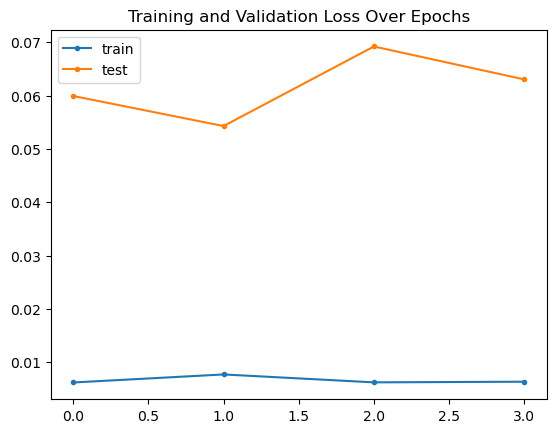

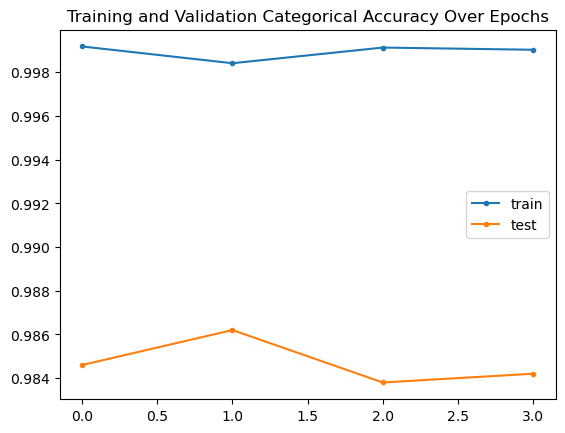

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - categorical_accuracy: 0.9943 - loss: 0.0203


[codecarbon INFO @ 03:53:03] 
Graceful stopping: collecting and writing information.
Please wait a few seconds...
[codecarbon INFO @ 03:53:03] Energy consumed for RAM : 0.015528 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:53:03] Energy consumed for all CPUs : 0.001999 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:53:03] 0.017528 kWh of electricity used since the beginning.
[codecarbon INFO @ 03:53:03] Done!

[codecarbon INFO @ 03:53:03] [setup] RAM Tracking...
[codecarbon INFO @ 03:53:03] [setup] GPU Tracking...
[codecarbon INFO @ 03:53:03] No GPU found.
[codecarbon INFO @ 03:53:03] [setup] CPU Tracking...
[codecarbon WARNING @ 03:53:03] No CPU tracking mode found. Falling back on CPU constant mode.


Loss: 0.02335115522146225, Accuracy: 0.9937999844551086
With earlystopping False


[codecarbon WARNING @ 03:53:04] We saw that you have a Intel(R) Xeon(R) Gold 6248 CPU @ 2.50GHz but we don't know it. Please contact us.
[codecarbon INFO @ 03:53:04] CPU Model on constant consumption mode: Intel(R) Xeon(R) Gold 6248 CPU @ 2.50GHz
[codecarbon INFO @ 03:53:04] >>> Tracker's metadata:
[codecarbon INFO @ 03:53:04]   Platform system: Linux-6.1.0-31-amd64-x86_64-with-glibc2.36
[codecarbon INFO @ 03:53:04]   Python version: 3.12.3
[codecarbon INFO @ 03:53:04]   CodeCarbon version: 2.2.2
[codecarbon INFO @ 03:53:04]   Available RAM : 880.353 GB
[codecarbon INFO @ 03:53:04]   CPU count: 80
[codecarbon INFO @ 03:53:04]   CPU model: Intel(R) Xeon(R) Gold 6248 CPU @ 2.50GHz
[codecarbon INFO @ 03:53:04]   GPU count: None
[codecarbon INFO @ 03:53:04]   GPU model: None


Epoch 1/10
1086/3000 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - categorical_accuracy: 0.9992 - loss: 0.0057

[codecarbon INFO @ 03:53:22] Energy consumed for RAM : 0.001376 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:53:22] Energy consumed for all CPUs : 0.000177 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:53:22] 0.001553 kWh of electricity used since the beginning.


2218/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - categorical_accuracy: 0.9991 - loss: 0.0061

[codecarbon INFO @ 03:53:37] Energy consumed for RAM : 0.002751 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:53:37] Energy consumed for all CPUs : 0.000354 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:53:37] 0.003105 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - categorical_accuracy: 0.9990 - loss: 0.0063 - val_categorical_accuracy: 0.9846 - val_loss: 0.0630
Epoch 2/10
 206/3000 ━━━━━━━━━━━━━━━━━━━━ 37s 13ms/step - categorical_accuracy: 1.0000 - loss: 0.0044

[codecarbon INFO @ 03:53:52] Energy consumed for RAM : 0.004126 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:53:52] Energy consumed for all CPUs : 0.000531 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:53:52] 0.004657 kWh of electricity used since the beginning.


1327/3000 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - categorical_accuracy: 0.9995 - loss: 0.0047

[codecarbon INFO @ 03:54:07] Energy consumed for RAM : 0.005502 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:54:07] Energy consumed for all CPUs : 0.000708 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:54:07] 0.006210 kWh of electricity used since the beginning.


2451/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - categorical_accuracy: 0.9994 - loss: 0.0049

[codecarbon INFO @ 03:54:22] Energy consumed for RAM : 0.006877 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:54:22] Energy consumed for all CPUs : 0.000885 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:54:22] 0.007762 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - categorical_accuracy: 0.9994 - loss: 0.0049 - val_categorical_accuracy: 0.9836 - val_loss: 0.0733
Epoch 3/10
 450/3000 ━━━━━━━━━━━━━━━━━━━━ 33s 13ms/step - categorical_accuracy: 0.9999 - loss: 0.0044

[codecarbon INFO @ 03:54:37] Energy consumed for RAM : 0.008252 kWh. RAM Power : 330.13251399993896 W


 454/3000 ━━━━━━━━━━━━━━━━━━━━ 33s 13ms/step - categorical_accuracy: 0.9999 - loss: 0.0044

[codecarbon INFO @ 03:54:37] Energy consumed for all CPUs : 0.001063 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:54:37] 0.009315 kWh of electricity used since the beginning.


1583/3000 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - categorical_accuracy: 0.9999 - loss: 0.0039

[codecarbon INFO @ 03:54:52] Energy consumed for RAM : 0.009627 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:54:52] Energy consumed for all CPUs : 0.001240 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:54:52] 0.010867 kWh of electricity used since the beginning.


2711/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - categorical_accuracy: 0.9999 - loss: 0.0038

[codecarbon INFO @ 03:55:07] Energy consumed for RAM : 0.011003 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:55:07] Energy consumed for all CPUs : 0.001417 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:55:07] 0.012419 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - categorical_accuracy: 0.9999 - loss: 0.0038 - val_categorical_accuracy: 0.9806 - val_loss: 0.0707
Epoch 4/10
 706/3000 ━━━━━━━━━━━━━━━━━━━━ 30s 13ms/step - categorical_accuracy: 0.9995 - loss: 0.0049

[codecarbon INFO @ 03:55:22] Energy consumed for RAM : 0.012378 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:55:22] Energy consumed for all CPUs : 0.001594 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:55:22] 0.013972 kWh of electricity used since the beginning.


1830/3000 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - categorical_accuracy: 0.9995 - loss: 0.0046

[codecarbon INFO @ 03:55:37] Energy consumed for RAM : 0.013753 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:55:37] Energy consumed for all CPUs : 0.001771 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:55:37] 0.015524 kWh of electricity used since the beginning.


2954/3000 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - categorical_accuracy: 0.9995 - loss: 0.0045

[codecarbon INFO @ 03:55:52] Energy consumed for RAM : 0.015129 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:55:52] Energy consumed for all CPUs : 0.001948 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:55:52] 0.017076 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - categorical_accuracy: 0.9995 - loss: 0.0045 - val_categorical_accuracy: 0.9828 - val_loss: 0.0729
Epoch 5/10
 958/3000 ━━━━━━━━━━━━━━━━━━━━ 27s 13ms/step - categorical_accuracy: 0.9990 - loss: 0.0066

[codecarbon INFO @ 03:56:07] Energy consumed for RAM : 0.016504 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:56:07] Energy consumed for all CPUs : 0.002125 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:56:07] 0.018629 kWh of electricity used since the beginning.


2086/3000 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - categorical_accuracy: 0.9993 - loss: 0.0055

[codecarbon INFO @ 03:56:22] Energy consumed for RAM : 0.017879 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:56:22] Energy consumed for all CPUs : 0.002302 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:56:22] 0.020181 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - categorical_accuracy: 0.9994 - loss: 0.0051 - val_categorical_accuracy: 0.9852 - val_loss: 0.0637
Epoch 6/10
  90/3000 ━━━━━━━━━━━━━━━━━━━━ 38s 13ms/step - categorical_accuracy: 1.0000 - loss: 0.0033

[codecarbon INFO @ 03:56:37] Energy consumed for RAM : 0.019254 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:56:37] Energy consumed for all CPUs : 0.002479 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:56:37] 0.021733 kWh of electricity used since the beginning.


1214/3000 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - categorical_accuracy: 0.9997 - loss: 0.0039

[codecarbon INFO @ 03:56:52] Energy consumed for RAM : 0.020629 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:56:52] Energy consumed for all CPUs : 0.002656 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:56:52] 0.023286 kWh of electricity used since the beginning.


2338/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - categorical_accuracy: 0.9997 - loss: 0.0039

[codecarbon INFO @ 03:57:07] Energy consumed for RAM : 0.022005 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:57:07] Energy consumed for all CPUs : 0.002833 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:57:07] 0.024838 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - categorical_accuracy: 0.9996 - loss: 0.0039 - val_categorical_accuracy: 0.9870 - val_loss: 0.0584
Epoch 7/10
 335/3000 ━━━━━━━━━━━━━━━━━━━━ 35s 13ms/step - categorical_accuracy: 0.9998 - loss: 0.0047

[codecarbon INFO @ 03:57:22] Energy consumed for RAM : 0.023380 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:57:22] Energy consumed for all CPUs : 0.003010 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:57:22] 0.026390 kWh of electricity used since the beginning.


1455/3000 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - categorical_accuracy: 0.9998 - loss: 0.0042

[codecarbon INFO @ 03:57:37] Energy consumed for RAM : 0.024755 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:57:37] Energy consumed for all CPUs : 0.003187 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:57:37] 0.027943 kWh of electricity used since the beginning.


2579/3000 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - categorical_accuracy: 0.9998 - loss: 0.0043

[codecarbon INFO @ 03:57:52] Energy consumed for RAM : 0.026131 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:57:52] Energy consumed for all CPUs : 0.003364 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:57:52] 0.029495 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - categorical_accuracy: 0.9998 - loss: 0.0043 - val_categorical_accuracy: 0.9866 - val_loss: 0.0601
Epoch 8/10
 578/3000 ━━━━━━━━━━━━━━━━━━━━ 32s 13ms/step - categorical_accuracy: 1.0000 - loss: 0.0032

[codecarbon INFO @ 03:58:07] Energy consumed for RAM : 0.027506 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:58:07] Energy consumed for all CPUs : 0.003541 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:58:07] 0.031047 kWh of electricity used since the beginning.


1702/3000 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - categorical_accuracy: 1.0000 - loss: 0.0031

[codecarbon INFO @ 03:58:22] Energy consumed for RAM : 0.028881 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:58:22] Energy consumed for all CPUs : 0.003719 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:58:22] 0.032600 kWh of electricity used since the beginning.


2822/3000 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - categorical_accuracy: 1.0000 - loss: 0.0031

[codecarbon INFO @ 03:58:37] Energy consumed for RAM : 0.030256 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:58:37] Energy consumed for all CPUs : 0.003896 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:58:37] 0.034152 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - categorical_accuracy: 1.0000 - loss: 0.0031 - val_categorical_accuracy: 0.9866 - val_loss: 0.0576
Epoch 9/10
 818/3000 ━━━━━━━━━━━━━━━━━━━━ 29s 13ms/step - categorical_accuracy: 1.0000 - loss: 0.0029

[codecarbon INFO @ 03:58:52] Energy consumed for RAM : 0.031631 kWh. RAM Power : 330.13251399993896 W


 822/3000 ━━━━━━━━━━━━━━━━━━━━ 29s 13ms/step - categorical_accuracy: 1.0000 - loss: 0.0029

[codecarbon INFO @ 03:58:52] Energy consumed for all CPUs : 0.004073 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:58:52] 0.035704 kWh of electricity used since the beginning.


1946/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - categorical_accuracy: 1.0000 - loss: 0.0029

[codecarbon INFO @ 03:59:07] Energy consumed for RAM : 0.033006 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:59:07] Energy consumed for all CPUs : 0.004250 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:59:07] 0.037256 kWh of electricity used since the beginning.


2998/3000 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - categorical_accuracy: 1.0000 - loss: 0.0029

[codecarbon INFO @ 03:59:22] Energy consumed for RAM : 0.034381 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:59:22] Energy consumed for all CPUs : 0.004427 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:59:22] 0.038808 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - categorical_accuracy: 1.0000 - loss: 0.0029 - val_categorical_accuracy: 0.9864 - val_loss: 0.0610
Epoch 10/10
1066/3000 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - categorical_accuracy: 1.0000 - loss: 0.0029

[codecarbon INFO @ 03:59:37] Energy consumed for RAM : 0.035757 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:59:37] Energy consumed for all CPUs : 0.004604 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:59:37] 0.040360 kWh of electricity used since the beginning.


2182/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - categorical_accuracy: 1.0000 - loss: 0.0029

[codecarbon INFO @ 03:59:52] Energy consumed for RAM : 0.037132 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 03:59:52] Energy consumed for all CPUs : 0.004781 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 03:59:52] 0.041913 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - categorical_accuracy: 1.0000 - loss: 0.0029 - val_categorical_accuracy: 0.9862 - val_loss: 0.0610


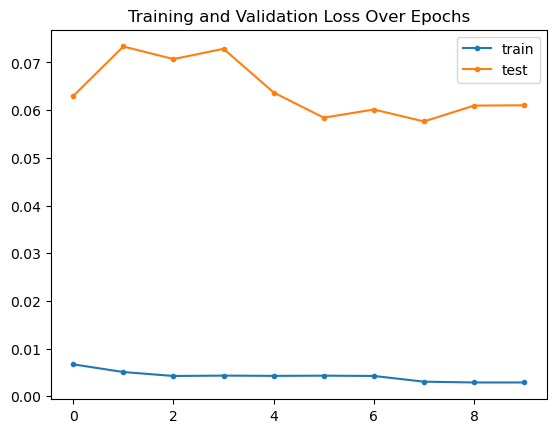

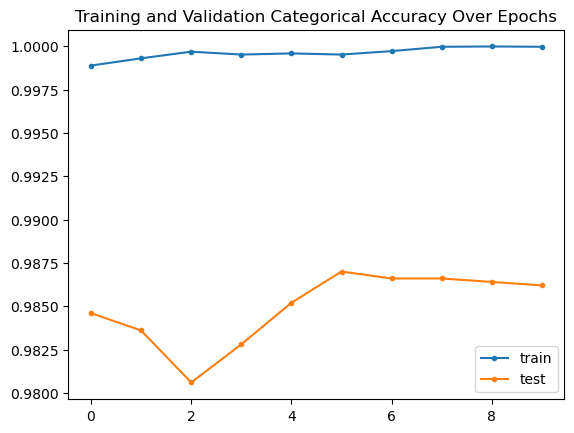

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - categorical_accuracy: 0.9952 - loss: 0.0195


[codecarbon INFO @ 04:00:06] 
Graceful stopping: collecting and writing information.
Please wait a few seconds...
[codecarbon INFO @ 04:00:06] Energy consumed for RAM : 0.038416 kWh. RAM Power : 330.13251399993896 W
[codecarbon INFO @ 04:00:06] Energy consumed for all CPUs : 0.004946 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 04:00:06] 0.043362 kWh of electricity used since the beginning.
[codecarbon INFO @ 04:00:06] Done!



Loss: 0.022202124819159508, Accuracy: 0.995199978351593


In [29]:

@track_emissions
def large_model_run(X_train, y_train, call_back_large, X_validation, y_validation, X_test, y_test, e_stopping):
    # Large Model
    large.compile(
        loss= keras.losses.CategoricalCrossentropy(),
        optimizer=keras.optimizers.SGD(),
        metrics=[keras.metrics.CategoricalAccuracy()]
    )
    call_backs = [call_back_large]
    if e_stopping:
        call_backs.append(early_stopping)
        
    large_history = large.fit(X_train,y_train,
                    epochs=10, batch_size=20,
                    callbacks= call_backs,
                    validation_data=(X_validation,y_validation))
    
    #plotting loss 
    plt.plot(large_history.history['loss'],'.-', label = 'train')
    plt.plot(large_history.history['val_loss'],'.-', label = 'test')
    plt.title('Training and Validation Loss Over Epochs')
    plt.legend()
    plt.show()

    # plotting categorical accuracy
    plt.plot(large_history.history['categorical_accuracy'],'.-', label = 'train')
    plt.plot(large_history.history['val_categorical_accuracy'],'.-', label = 'test')
    plt.title('Training and Validation Categorical Accuracy Over Epochs')
    plt.legend()
    plt.show()

    loss_large,acc_large = large.evaluate(X_test,y_test)
    print(f'Loss: {loss_large}, Accuracy: {acc_large}')
    
e_stopping = [True, False]
for e_stop in e_stopping:
    print(f'With earlystopping {e_stop}')
    large_model_run(X_train, y_train, call_back_large, X_validation, y_validation, X_test, y_test, e_stop)